## 1. Error Function

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
import math

$$ erf(x) = \frac{2}{\sqrt{\pi}} \int^x_0e^{-t^2}dt $$

* 위와 같이 주어지는 에러함수를 수치적분을 이용하여 구하고 그래프를 그려라. (어떤 방법을 이용하든 관계없음)

x = 3 일 때, 오차함수값 = 0.9999999999984799


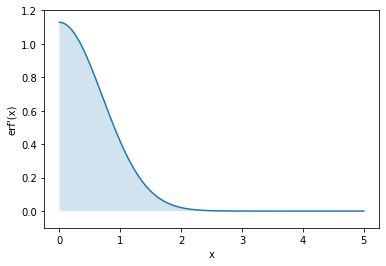

In [2]:
def f(x):
    return 2/np.pi**0.5*np.exp(-x**2)

def trapez(f,a,b,dx):
    s,x = 0, a
    while (x<b):
        s += (0.5)*(f(x+dx)+f(x))*dx   
        x = x + dx
    return s

print('x = 3 일 때, 오차함수값 =',trapez(f,0,5,0.001))

x = np.arange(0,5,0.001)
plt.plot(x,f(x))
plt.ylim(-0.1,1.2)
plt.xlabel('x')
plt.ylabel("erf'(x)")
plt.fill_between(x,f(x),alpha=0.2);

$ erf(x) $   $$= \frac{2}{\sqrt\pi}\Sigma^\infty_{n = 0} \frac{(-1)^n x^{2n+1}}{(2n+1)n!} (1)$$ 
$$= \frac{2}{\sqrt\pi}(x-\frac{x^3}{3}+\frac{x^5}{10}-\frac{x^7}{42}+\cdots) (2)$$

* 에러함수를 테일러 전개하면 위와 같이 주어진다. 위의 전개식과 적분결과를 그래프로 그리고 비교하여라.

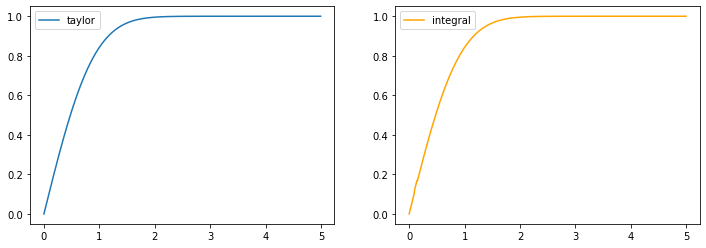

In [17]:
def taylor(n):
    i, f = 0,0
    while (i<=n+1):
        f = f + 2*(-1)**i*x**(2*i+1)/(np.pi**0.5*(2*i+1)*math.factorial(i))
        i = i + 1
    return f

fig = plt.figure(figsize=(12,4))
subplot = fig.add_subplot(1,2,1)
x = np.arange(0,5,0.01)
plt.plot(x,taylor(100),label = 'taylor')
plt.legend();

def f(x):
    return 2/np.pi**0.5*np.exp(-x**2)

def trapez(f,a,b,dx):
    s,x = 0, a
    while (x<b):
        s += (0.5)*(f(x+dx)+f(x))*dx   
        x = x + dx
    return s

subplot = fig.add_subplot(1,2,2)
xdata = np.arange(0,5,0.01)
ydata = np.array([trapez(f,0,b,0.01) for b in xdata])
plt.plot(xdata,ydata,color='orange',label='integral')
plt.legend();

## 2. (Integration) Trigonometric Function

* sin, cos함수를 trapezoidal 방법을 이용하여 직접 적분하고 그래프를 그려라.

In [18]:
def f(x):
    return np.sin(x)
def g(x):
    return np.cos(x)

def trapez(f,a,b,dx):
    s,x = 0, a
    while (x<b):
        s += (0.5)*(f(x+dx)+f(x))*dx   
        x = x + dx
    return s

# x = pi 일 때,
print('실제 sin함수 적분값 =', -np.cos(np.pi) + np.cos(0))
print('trapezoidal 방법을 이용한 sin함수 적분값 =',trapez(f,0,np.pi,1),trapez(f,0,np.pi,0.5),trapez(f,0,np.pi,0.1))
print('실제 cos함수 적분값 =', round(np.sin(np.pi) - np.sin(0),10))
print('trapezoidal 방법을 이용한 cos함수 적분값 =',trapez(g,0,np.pi,1),trapez(g,0,np.pi,0.5),trapez(g,0,np.pi,0.1))

실제 sin함수 적분값 = 2.0
trapezoidal 방법을 이용한 sin함수 적분값 = 1.5134871720394811 1.8959447375804248 1.9966292525412175
실제 cos함수 적분값 = 0.0
trapezoidal 방법을 이용한 cos함수 적분값 = -0.692658837711254 -0.3434446114568521 -0.05832549019860685


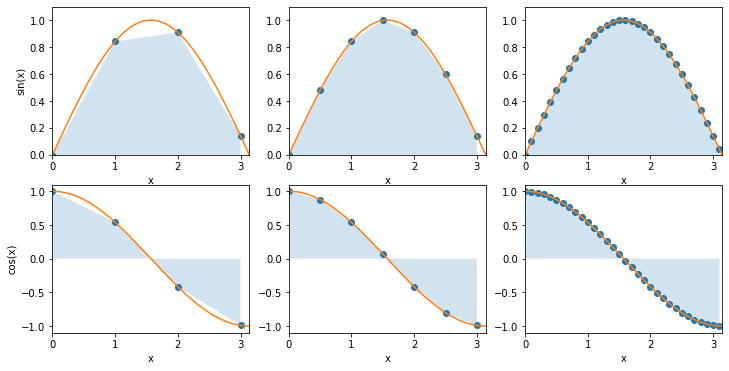

In [5]:
x1 = np.arange(0,np.pi,1)
x2 = np.arange(0,np.pi,0.5)
x3 = np.arange(0,np.pi,0.1)

xdata = np.arange(0,np.pi,0.01)

plt.figure(figsize=(12,6));
plt.subplot(2,3,1)
plt.xlim(0,np.pi);plt.ylim(0,1.1)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.plot(x1,f(x1),'o');
plt.plot(xdata,f(xdata));
plt.fill_between(x1,f(x1),alpha=0.2)

plt.subplot(2,3,2)
plt.xlim(0,np.pi);plt.ylim(0,1.1)
plt.xlabel('x')
plt.plot(x2,f(x2),'o');
plt.plot(xdata,f(xdata));
plt.fill_between(x2,f(x2),alpha=0.2)

plt.subplot(2,3,3)
plt.xlim(0,np.pi);plt.ylim(0,1.1)
plt.xlabel('x')
plt.plot(x3,f(x3),'o');
plt.plot(xdata,f(xdata));
plt.fill_between(x3,f(x3),alpha=0.2)

plt.subplot(2,3,4)
plt.xlim(0,np.pi);plt.ylim(-1.1,1.1)
plt.xlabel('x')
plt.ylabel('cos(x)')
plt.plot(x1,g(x1),'o');
plt.plot(xdata,g(xdata));
plt.fill_between(x1,g(x1),alpha=0.2)

plt.subplot(2,3,5)
plt.xlim(0,np.pi);plt.ylim(-1.1,1.1)
plt.xlabel('x')
plt.plot(x2,g(x2),'o');
plt.plot(xdata,g(xdata));
plt.fill_between(x2,g(x2),alpha=0.2)

plt.subplot(2,3,6)
plt.xlim(0,np.pi);plt.ylim(-1.1,1.1)
plt.xlabel('x')
plt.plot(x3,g(x3),'o');
plt.plot(xdata,g(xdata));
plt.fill_between(x3,g(x3),alpha=0.2);

구체적으로 $\int^x_0 sin(t)dt,\int^x_0 cos(t)dt$를 x에 대해서 그려라.

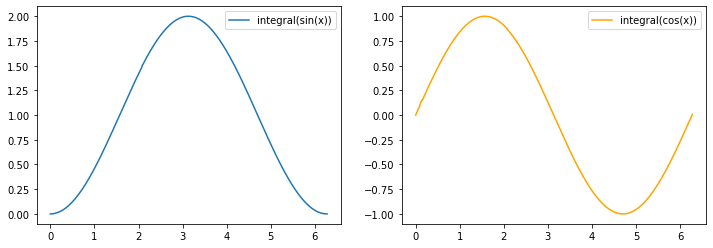

In [6]:
# x = 2*pi 일 때,

fig = plt.figure(figsize=(12,4))
subplot = fig.add_subplot(1,2,1)
xdata = np.arange(0,2*np.pi,0.01)
ydata = np.array([trapez(f,0,b,0.01) for b in xdata])
plt.plot(xdata,ydata,label='integral(sin(x))')
plt.legend()


subplot = fig.add_subplot(1,2,2)
xdata = np.arange(0,2*np.pi,0.01)
ydata = np.array([trapez(g,0,b,0.01) for b in xdata])
plt.plot(xdata,ydata,color='orange',label='integral(cos(x))')
plt.legend();

* sin, cos함수를 scipy.integrate 함수를 이용하여 적분하고 그래프를 그려라.

In [7]:
# x = pi 일 때,
print('scipy.integrate 함수를 이용한 sin함수 적분값 =',integrate.quad(f,0,np.pi)[0])
print('scipy.integrate 함수를 이용한 cos함수 적분값 =',integrate.quad(g,0,np.pi)[0])

scipy.integrate 함수를 이용한 sin함수 적분값 = 2.0
scipy.integrate 함수를 이용한 cos함수 적분값 = 3.6775933888827275e-17


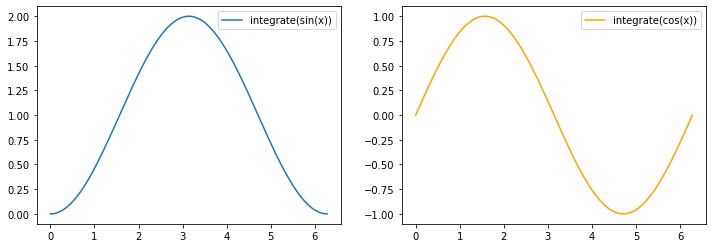

In [8]:
# x = 2*pi 일 때,

fig = plt.figure(figsize=(12,4))
subplot = fig.add_subplot(1,2,1)
xdata = np.arange(0,2*np.pi,0.01)
ydata = np.array([integrate.quad(f,0,b)[0] for b in xdata])
plt.plot(xdata,ydata,label='integrate(sin(x))')
plt.legend()


subplot = fig.add_subplot(1,2,2)
xdata = np.arange(0,2*np.pi,0.01)
ydata = np.array([integrate.quad(g,0,b)[0] for b in xdata])
plt.plot(xdata,ydata,color='orange',label='integrate(cos(x))')
plt.legend();

이 때 그래프도 위 그래프와 같음.

## 3. (Differentiation) Trigonometric Function

* sin, cos함수의 도함수를 finite difference 방법을 이용하여 구현하고 그래프를 그려라.

In [9]:
def f(x):
    return np.sin(x)
def g(x):
    return np.cos(x)

def for_diff_f(f,x,dx):
    return(f(x+dx) - f(x))/dx
def back_diff_f(f,x,dx):
    return(f(x) - f(x-dx))/dx
def cen_diff_f(f,x,dx):
    return(f(x+dx)/2 - f(x-dx)/2)/dx

def for_diff_g(g,x,dx):
    return(g(x+dx) - g(x))/dx
def back_diff_g(g,x,dx):
    return(g(x) - g(x-dx))/dx
def cen_diff_g(g,x,dx):
    return(g(x+dx)/2 - g(x-dx)/2)/dx

# x = pi 에서 미분값
print('x = pi에서 sin(x) 미분값 =',for_diff_f(f,np.pi,dx=0.01),back_diff_f(f,np.pi,dx=0.01),cen_diff_f(f,np.pi,dx=0.01))
print('x = pi에서 cos(x) 미분값 =',for_diff_g(g,np.pi,dx=0.01),back_diff_g(g,np.pi,dx=0.01),cen_diff_g(g,np.pi,dx=0.01))

x = pi에서 sin(x) 미분값 = -0.9999833334166452 -0.9999833334166451 -0.9999833334166451
x = pi에서 cos(x) 미분값 = 0.004999958333473664 -0.004999958333473664 0.0


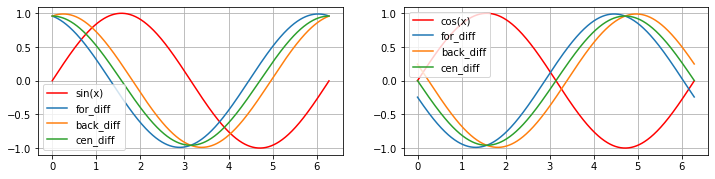

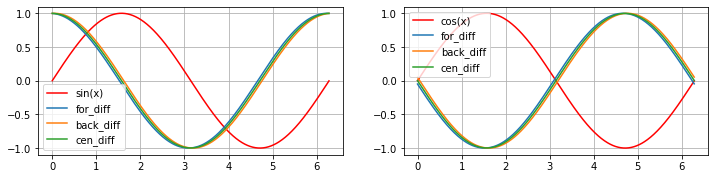

In [10]:
dx=0.5
xdata=np.arange(0,2*np.pi,0.01)
diff1=[for_diff_f(f,i,dx) for i in xdata]
diff2=[back_diff_f(f,i,dx) for i in xdata]
diff3=[cen_diff_f(f,i,dx) for i in xdata]

diff4=[for_diff_g(g,i,dx) for i in xdata]
diff5=[back_diff_g(g,i,dx) for i in xdata]
diff6=[cen_diff_g(g,i,dx) for i in xdata]

plt.figure(figsize=(12,6));
plt.subplot(2,2,1)
plt.plot(xdata,f(xdata),color = 'red',label = 'sin(x)')
plt.plot(xdata,diff1,label = 'for_diff')
plt.plot(xdata,diff2,label = 'back_diff')
plt.plot(xdata,diff3,label = 'cen_diff')
plt.grid()
plt.legend()

plt.subplot(2,2,2)
plt.plot(xdata,f(xdata),color = 'red',label = 'cos(x)')
plt.plot(xdata,diff4,label = 'for_diff')
plt.plot(xdata,diff5,label = 'back_diff')
plt.plot(xdata,diff6,label = 'cen_diff')
plt.grid()
plt.legend()

dx=0.1
xdata=np.arange(0,2*np.pi,0.01)
diff1=[for_diff_f(f,i,dx) for i in xdata]
diff2=[back_diff_f(f,i,dx) for i in xdata]
diff3=[cen_diff_f(f,i,dx) for i in xdata]

diff4=[for_diff_g(g,i,dx) for i in xdata]
diff5=[back_diff_g(g,i,dx) for i in xdata]
diff6=[cen_diff_g(g,i,dx) for i in xdata]

plt.figure(figsize=(12,6));
plt.subplot(2,2,3)
plt.plot(xdata,f(xdata),color = 'red',label = 'sin(x)')
plt.plot(xdata,diff1,label = 'for_diff')
plt.plot(xdata,diff2,label = 'back_diff')
plt.plot(xdata,diff3,label = 'cen_diff')
plt.grid()
plt.legend()

plt.subplot(2,2,4)
plt.plot(xdata,f(xdata),color = 'red',label = 'cos(x)')
plt.plot(xdata,diff4,label = 'for_diff')
plt.plot(xdata,diff5,label = 'back_diff')
plt.plot(xdata,diff6,label = 'cen_diff')
plt.grid()
plt.legend();

* sin, cos함수의 도함수를 scipy.misc.derivative 함수를 이용하여 구하고 그래프를 그려라.

In [11]:
from scipy.misc import derivative
# x = pi 일 때 미분값
print('sin함수의 미분값 =',derivative(np.sin,np.pi,dx=0.01))
print('cos함수의 미분값 =',derivative(np.cos,np.pi,dx=0.01))

sin함수의 미분값 = -0.9999833334166451
cos함수의 미분값 = 0.0


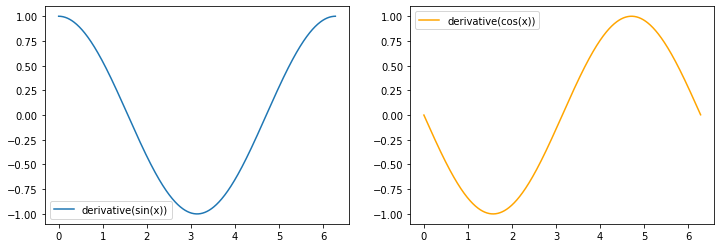

In [12]:
# x = 2*pi 일 때,

fig = plt.figure(figsize=(12,4))
subplot = fig.add_subplot(1,2,1)
xdata = np.arange(0,2*np.pi,0.01)
ydata = np.array([derivative(np.sin,b,dx=0.01) for b in xdata])
plt.plot(xdata,ydata,label='derivative(sin(x))')
plt.legend()


subplot = fig.add_subplot(1,2,2)
xdata = np.arange(0,2*np.pi,0.01)
ydata = np.array([derivative(np.cos,b,dx=0.01) for b in xdata])
plt.plot(xdata,ydata,color='orange',label='derivative(cos(x))')
plt.legend();